Lab7 part1

**Лабораторын ажил 7: Centrality & Assortative Mixing**

Энэ долоо хоногийн лабораторын ажлаар бид зангилааны гол хэмжүүрүүд болох
centrality болон assortative mixing -ийн талаар судлах, кодчилох болно.


Note: Уг нотебүүк нь 100 хувь болон гүйцэт биш бөгөөд цаашид нэмэн судлахад шаардлагатай зөвхөн анхан шатны ойлголтуудыг багтаасан болно.


In [ ]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from scripts.load_and_build_graph import read_net

# Load edge file
G = read_net("data/asoiaf-all-edges.csv")

# Load node data
with open("data/asoiaf-all-nodes.csv", encoding="utf-8") as f:
    f.readline()
    for line in f:
        node, _, house = line.strip().split(",")
        G.add_node(node, house=house)

# Plot
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=30, with_labels=False)
plt.title("A Song of Ice and Fire Network")
plt.show()

: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Жижиг хэмжээний графыг дүрсэлж харуулах зорилготойгоор бичсэн нэмэлт функц
def draw_net(G, pos, measures, measure_name):
  plt.figure(figsize=(20,20))
  nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
  node_color=list(measures.values()), nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
  labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

**Centrality measures**

Бид зангилаануудын хувьд тухайн сүлжээндээ хэр чухал болохыг нь хэмжихдээ centrality
хэмжүүр ашигладаг.


Bad term:
  - nothing to do with being central in general

  
Usage:


  - Зарим centrality хэмжүүрүүд нь ойлгох тайлбарлахад энгийн амар хялбар байдаг.
  - Мөн centrality хэмжүүрүүд нь граф дээр машин сургалтыг хэрэгжүүлэх зангилааны шинж чанраар (node features) ашиглагддаг.


Бид python хэлний
хялбар бодож болно.


**Degree Centrality**


Тухайн зангилаа хэр олон хөрш оройтой вэ?


In [ ]:
degrees = dict(g.degree()) # compute the degree of a set of nodes (if specified).

In [ ]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Tyrion-Lannister', 122),
 ('Jon-Snow', 114),
 ('Jaime-Lannister', 101),
 ('Cersei-Lannister', 97),
 ('Stannis-Baratheon', 89)]

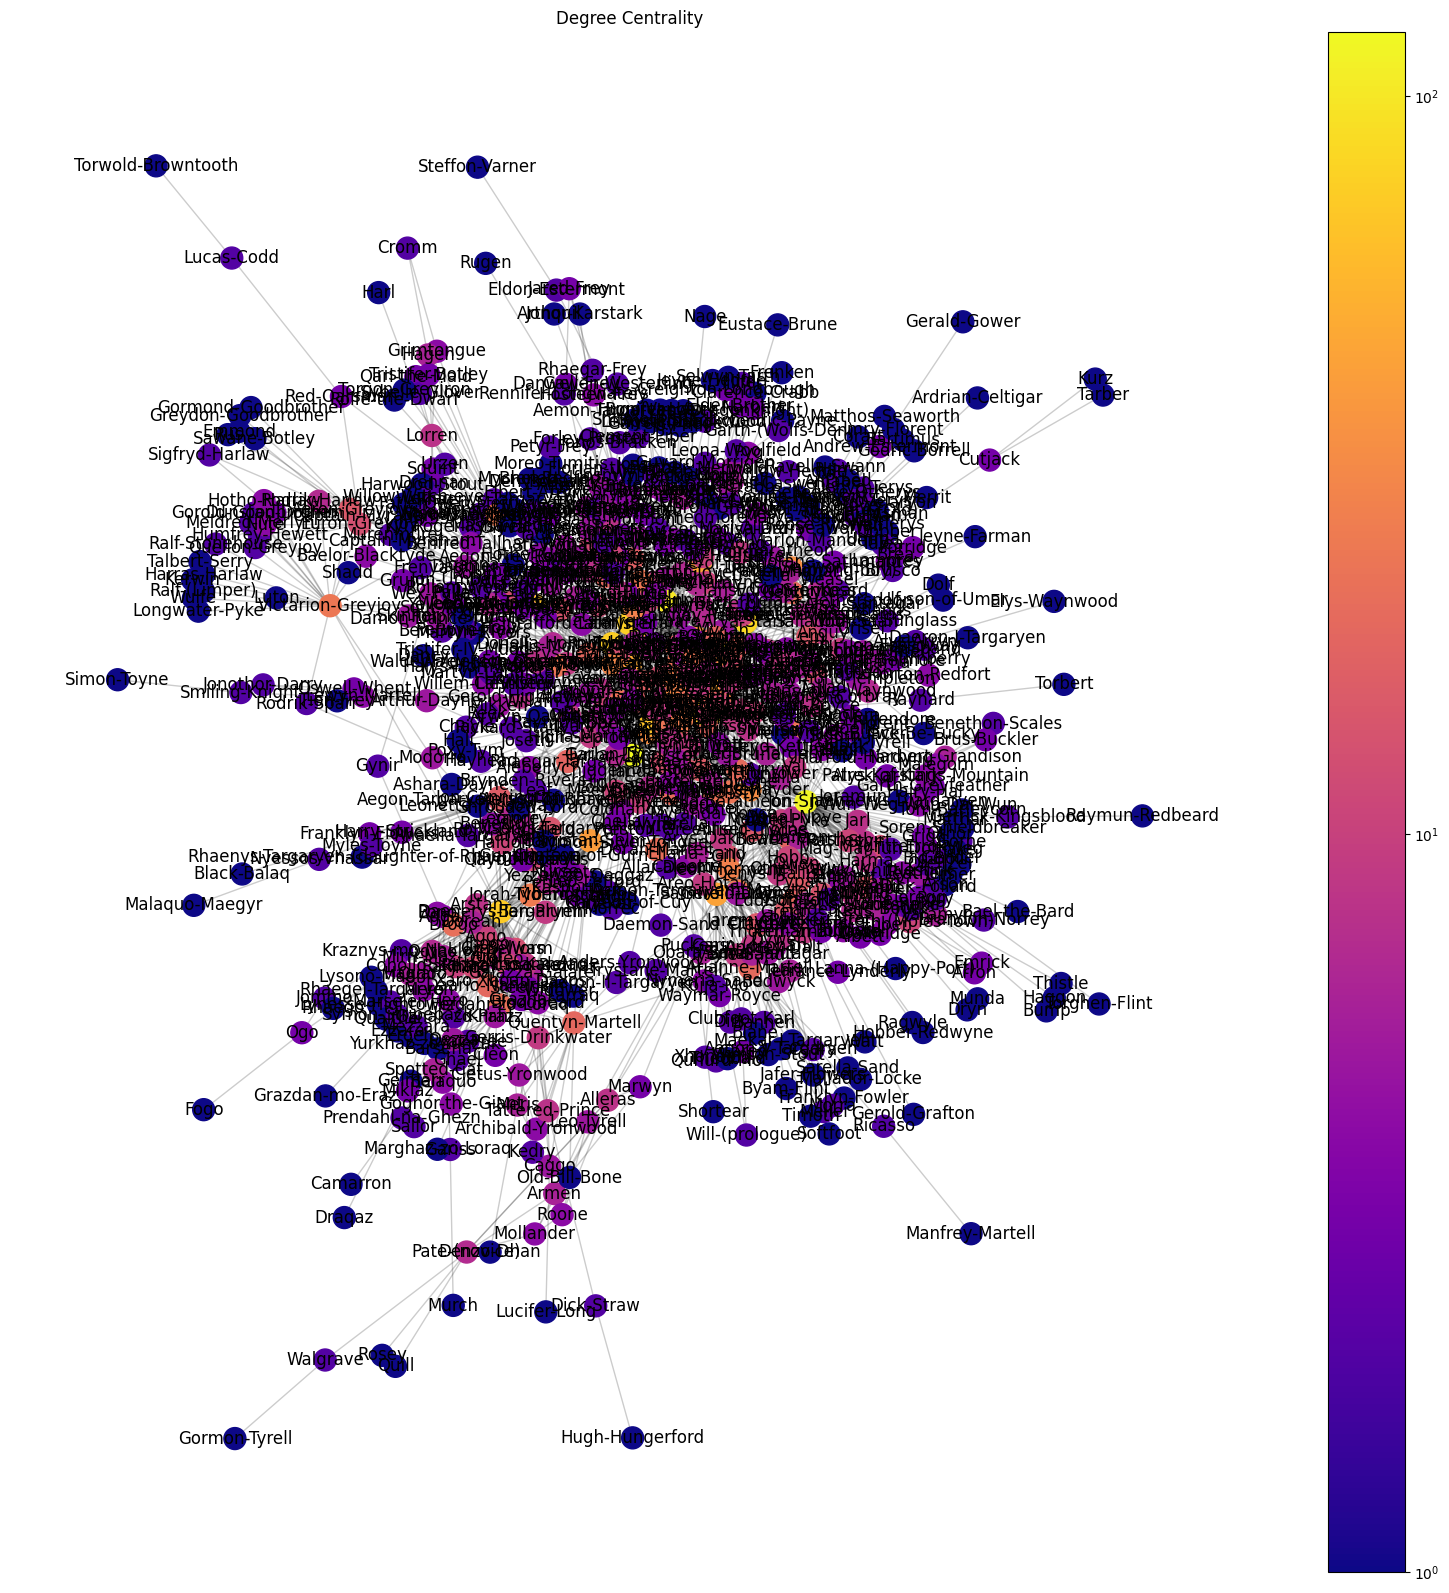

In [ ]:
draw_net(g, pos, degrees, 'Degree Centrality')

**Closeness Centrality**


Farness: тухайн оройгоор бусад бүх оройнуудад хүрэх богино замуудын уртын дундаж утга


Closeness: Farness-ийн эсрэг ойлголт (normalized by number of nodes)

In [ ]:
closeness = nx.closeness_centrality(g) # compute the closeness centraliry of all node

In [ ]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042)]

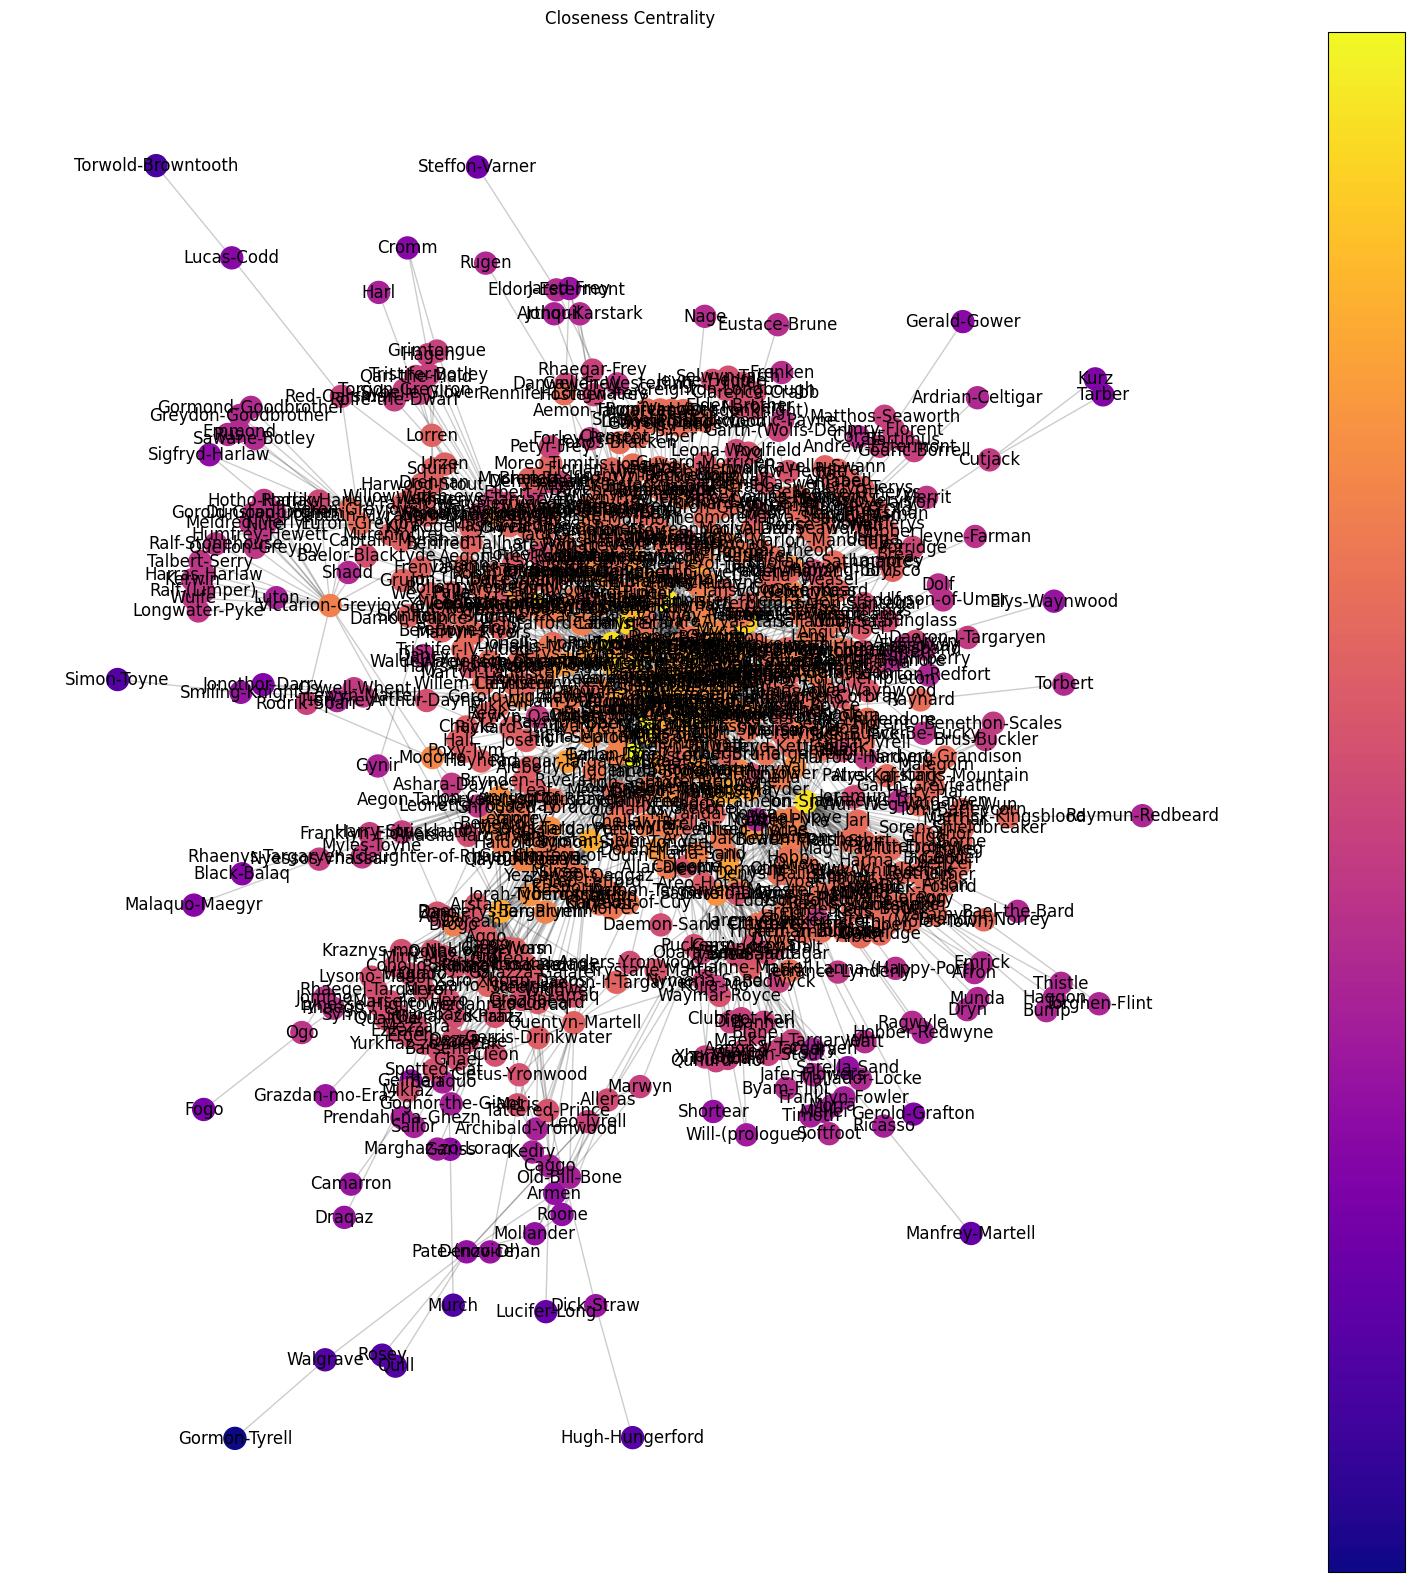

In [ ]:
draw_net(g, pos, closeness, 'Closeness Centrality')

**Betweenness Centrality**


Тухайн зангилаагаар дамжин явах боломжтой богино замуудын тоо
Таамаглал: чухал зангилаанууд нь мэдээлэл дамжуулах гүүр болдог.
Практикт: Хэрэв мэдээлэл богино замаар тархдаг бол чухал зангилаанууд нь олон олон богино замдээр олдоно


In [ ]:
betweenness = nx.betweenness_centrality(g) # compute the betweenness centraliry of al

In [ ]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566)]

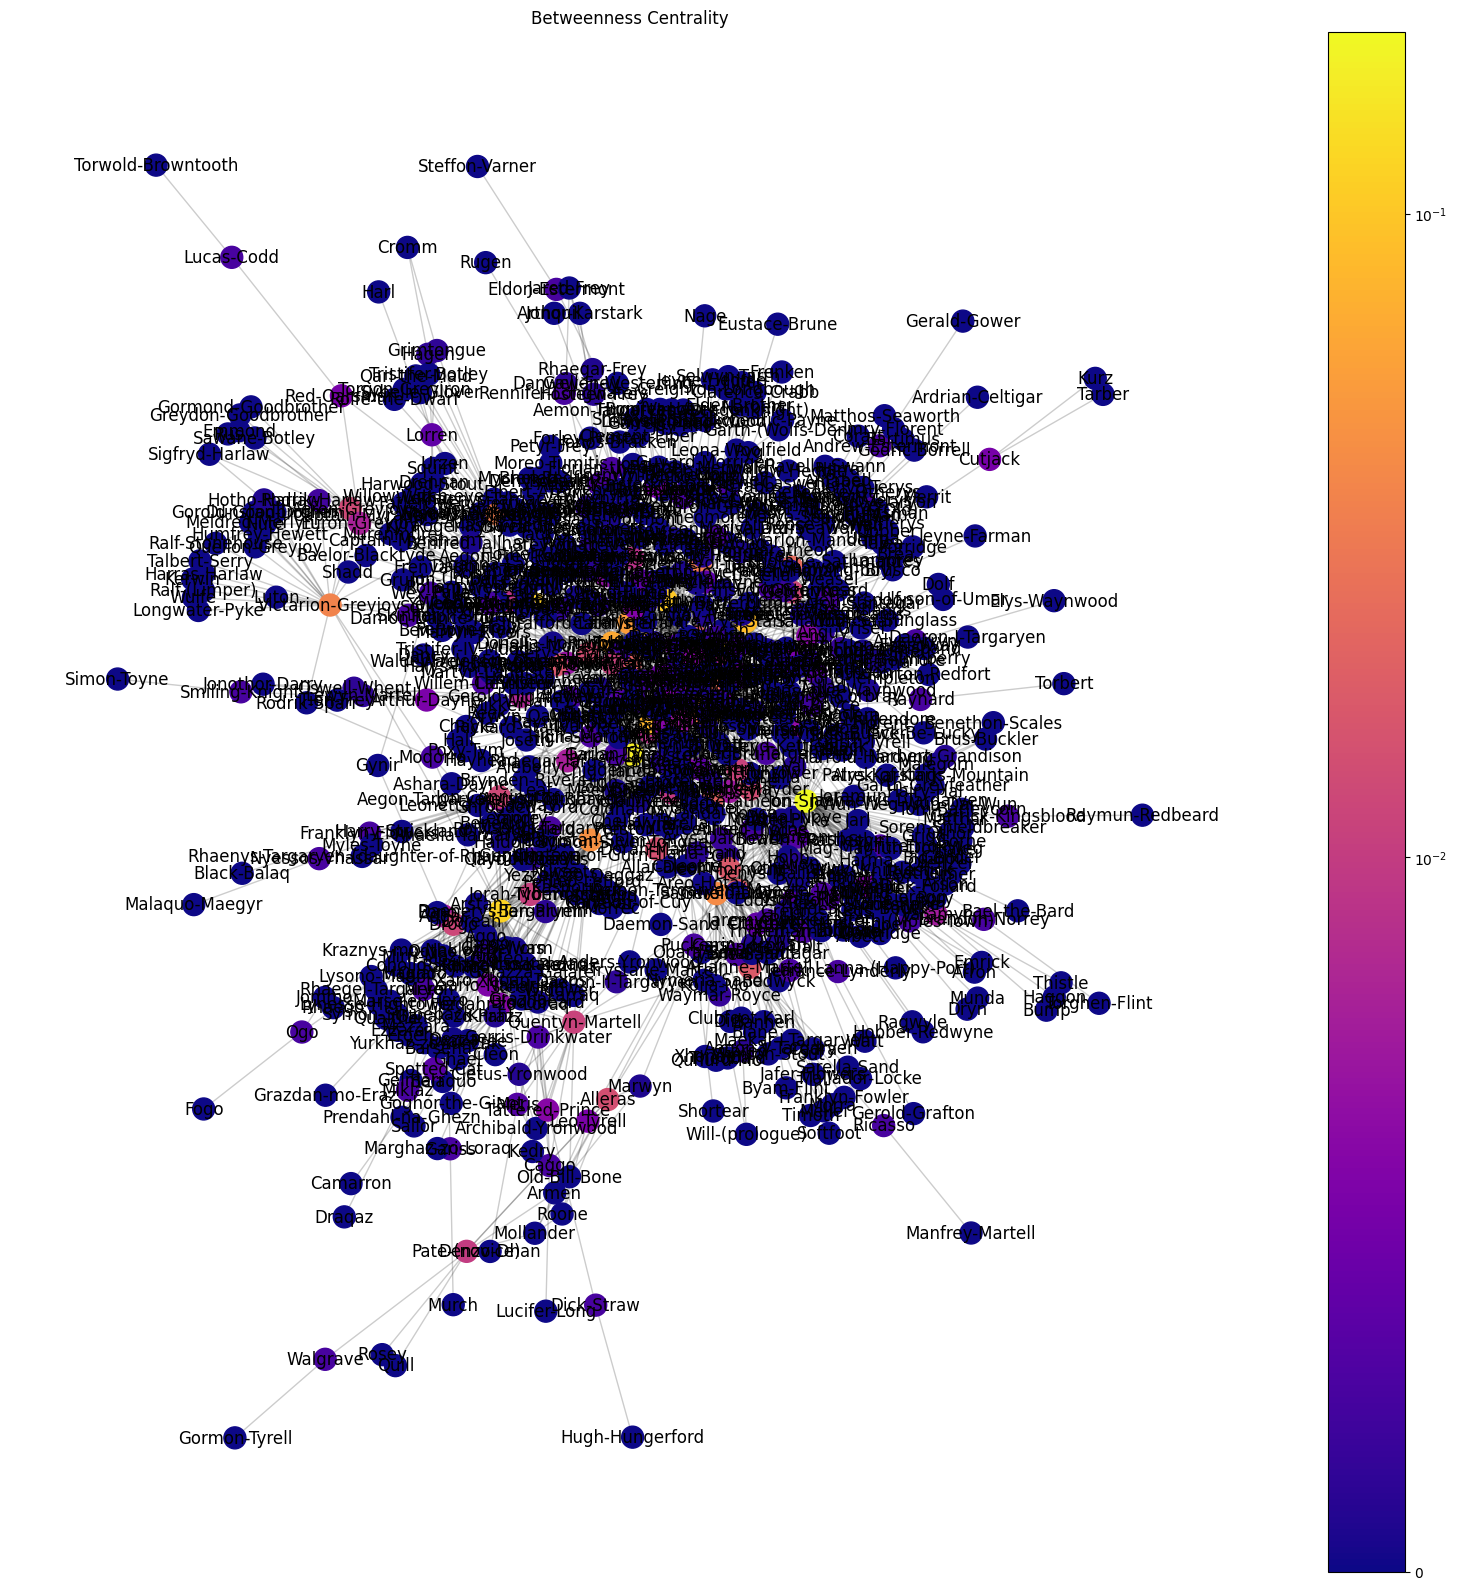

In [ ]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')

**Harmonic Centrality**


Өгөгдсөн оройгоос бусад бүх оройнууд руу хүрэх зайны гарминик буюу зохицолт дундаж

In [ ]:
harmonic = nx.harmonic_centrality(g)

In [ ]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Tyrion-Lannister', 427.9999999999993),
 ('Jon-Snow', 407.89999999999895),
 ('Cersei-Lannister', 407.16666666666606),
 ('Jaime-Lannister', 406.6999999999994),
 ('Eddard-Stark', 399.8333333333328)]

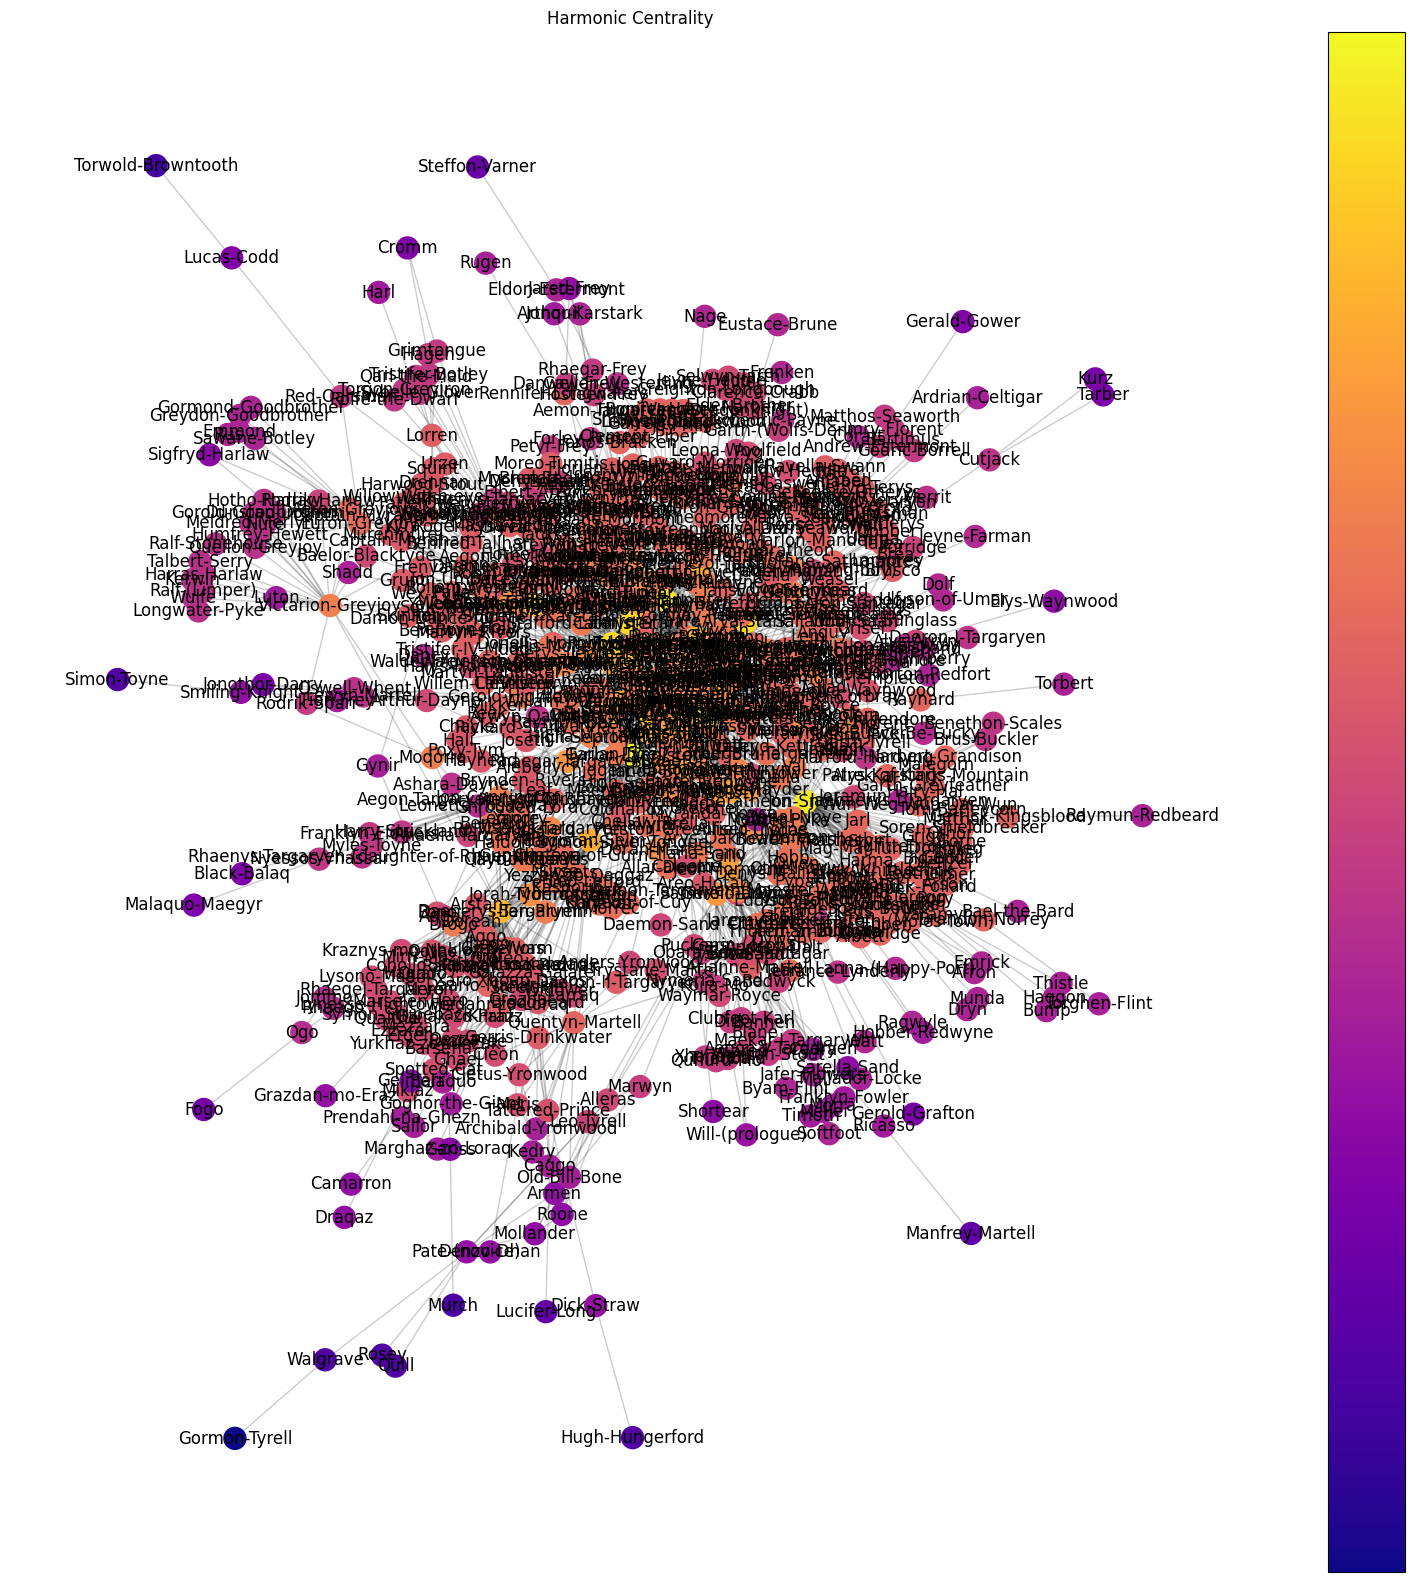

In [ ]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')

**PageRank**


Main idea:


The PageRank-ийн тооцоололын алгоритм нь Random Walk -процессоор тайлбарлагдана.


Санамсаргүй байдлаар дараагийн алхамд i оройд хүрэх магадлал нь зөвхөн одоогийн орой j болон транзишн магадлалаас хамааралтай. j ➝ i нь стохастик матрицаар
тодорхойлогдоно.


In [ ]:
pagerank = nx.pagerank(g)

In [ ]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Jon-Snow', 0.018999569248566855),
 ('Tyrion-Lannister', 0.018341232619311046),
 ('Jaime-Lannister', 0.015437447356269757),
 ('Stannis-Baratheon', 0.013648810781186758),
 ('Arya-Stark', 0.013432050115231258)]

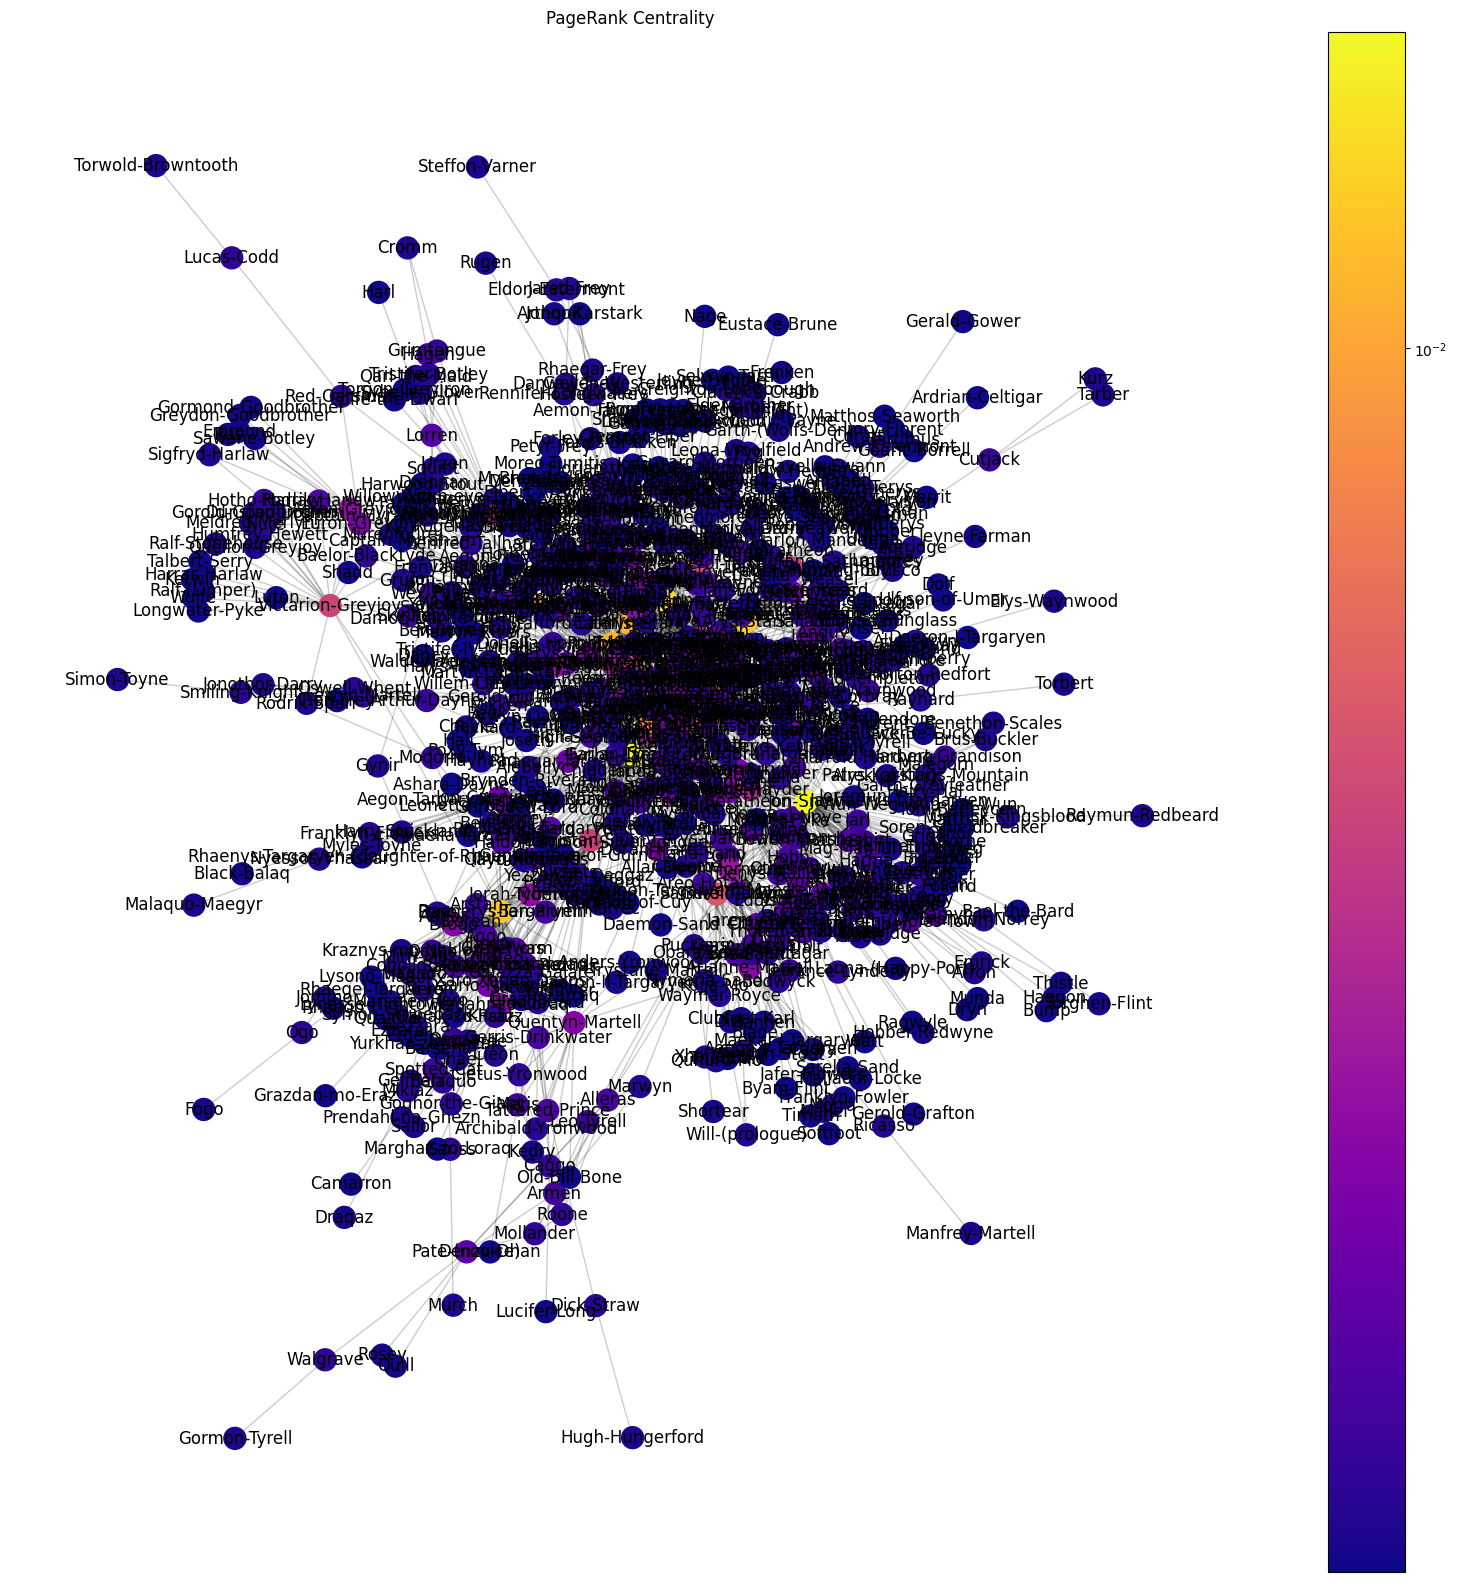

In [ ]:
draw_net(g, pos, pagerank, 'PageRank Centrality')

**Eigenvector Centrality**


Эйгийн вектор (x) болон эйгийн утга (λ)-ийн хослол нь дараах харьцаагаар тодорхойлогдоно.


  - x нь хэмжээ
𝑁
N-тэй вектор бөгөөд үүнийг нодуудын оноо гэж ойлгож болно.

  - 𝐴
𝑥
Ax нь ижил хэмжээтэй шинэ вектор үүсгэх бөгөөд энэ нь нэг нод бүрийн хөршүүдээс авсан онооны нийлбэрийг илэрхийлнэ.

  - Энэхүү тэнцэтгэл нь шинэ оноонууд өмнөх оноонуудтай пропорциональ байна гэсэн утгатай.

In [ ]:
eigen = nx.eigenvector_centrality(g)

In [ ]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Tyrion-Lannister', 0.25155836369081985),
 ('Cersei-Lannister', 0.2357712102434476),
 ('Jaime-Lannister', 0.22633850166044056),
 ('Joffrey-Baratheon', 0.21437627019042793),
 ('Sansa-Stark', 0.20584216286964788)]

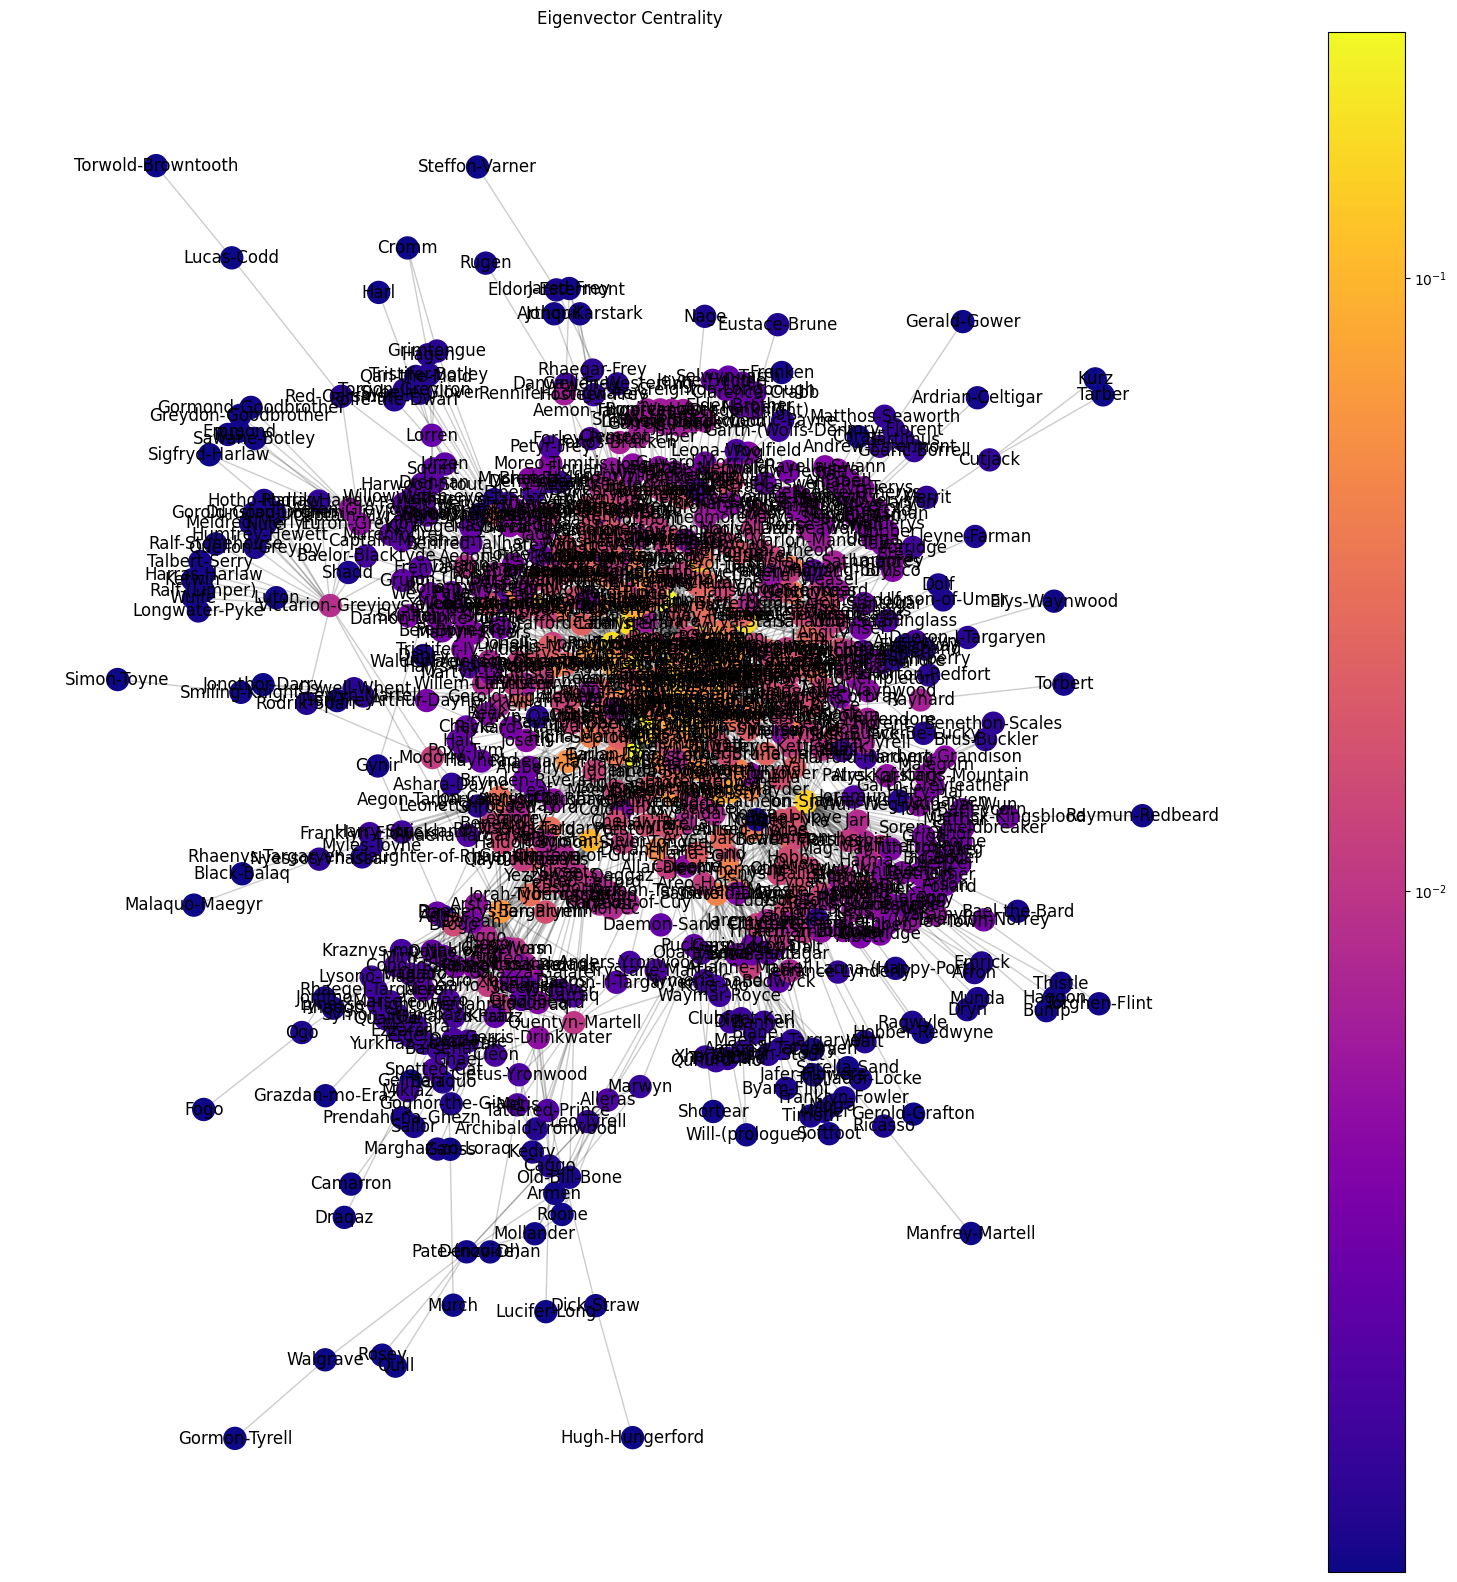

In [ ]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')

**Assortative Mixing**


Homophily Сүлжээнд байх ижил шинж чанар буюу аттрибут бүхий оройнууд нь хоорондоо холбогдох магадлал нь тооцоолж байснаас өндөр байх хандлагатай.


It appears as correlation between vertex properties of x(i) and x(j) if (i,j) ∈ E


Disassortative mixing: Contrary of homophily: өөр төрлийн буюу ижил бус оройнууд хоорондоо холбогддог хандлагатай сүлжээ ч байдаг жишээлбэл (e.g., sexual networks, predator-prey)


**Network wide (global) Assortativity measures**

**Newman's Assortativity**


Quantify homophily while scalar node properties are involved (e.g., degree)
Degree assortative
  
  - Nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs)


Degree disassortative
   - Nodes tends to connect in a star-like topology


**KNNK**


Нэг нодын хөршүүдийн дундаж зэрэг (degree) нь тухайн нодын зэргээс хамааран ямар байхыг хэрхэн тооцоолж болох вэ?

In [ ]:
pip install networkx

DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
knn = nx.average_neighbor_degree(g)
knn = dict(sorted(knn.items()))

print(knn)

{'Addam-Marbrand': 46.25, 'Aegon-Frey-(son-of-Stevron)': 43.25, 'Aegon-I-Targaryen': 41.666666666666664, 'Aegon-Targaryen-(son-of-Rhaegar)': 23.066666666666666, 'Aegon-V-Targaryen': 26.0, 'Aemon-Targaryen-(Dragonknight)': 101.0, 'Aemon-Targaryen-(Maester-Aemon)': 22.115384615384617, 'Aenys-Frey': 42.75, 'Aeron-Greyjoy': 10.866666666666667, 'Aerys-I-Targaryen': 65.0, 'Aerys-II-Targaryen': 38.73684210526316, 'Aggar': 7.0, 'Aggo': 22.8, 'Alayaya': 61.25, 'Albett': 42.666666666666664, 'Alebelly': 17.75, 'Alerie-Hightower': 26.5, 'Alester-Florent': 28.571428571428573, 'Alla-Tyrell': 25.0, 'Allar-Deem': 72.5, 'Allard-Seaworth': 41.333333333333336, 'Alleras': 12.375, 'Alliser-Thorne': 41.666666666666664, 'Alyn': 35.6, 'Alys-Arryn': 9.0, 'Alys-Karstark': 47.0, 'Alysane-Mormont': 39.666666666666664, 'Amabel': 43.0, 'Amerei-Frey': 39.333333333333336, 'Amory-Lorch': 34.15, 'Anders-Yronwood': 19.5, 'Andrew-Estermont': 13.333333333333334, 'Andrey-Dalt': 13.0, 'Anguy': 20.666666666666668, 'Anya-Wayn

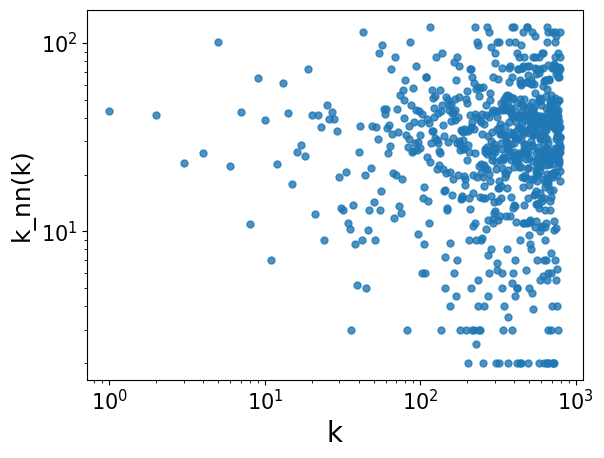

In [ ]:
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
plt.loglog()
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Newman Assortativity on node properties**


Same as the standard Newman's assortativity but computed on semantic information attached to nodes (e.g., labels)


**Node (local) Assortativity measures**


Idea: A local measure that captures the mixing patterns within the local neighbourhood of a given node.


In [ ]:
pip install --upgrade node-conformity


DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
pip install pip==24.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [ ]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.2 MB/s eta 0:00:00
    numpy (>=1.15.*)
           ~~~~~~~^
  Attempting uninstall: pip
    Found existing installation: pip 24.1
    Uninstalling pip-24.1:
      Successfully uninstalled pip-24.1


In [ ]:
pip install node_conformity

  Using cached node_conformity-0.0.2-py3-none-any.whl.metadata (815 bytes)
Using cached node_conformity-0.0.2-py3-none-any.whl (15 kB)
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import networkx as nx

# Графыг үүсгэх
g = nx.Graph()

# Жишээ өгөгдлөөр графад хавсаргах
g.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C')])

# Холбоотой хэсгүүдийг олох
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
h0 = g.subgraph(gcc[0])

# Үр дүнг харуулах
print(f"Томоохон холбоо: {h0.nodes()}")


Томоохон холбоо: ['A', 'B', 'C']


In [ ]:
from conformity import attribute_conformity
import pandas as pd
import networkx as nx

# Графыг үүсгэх
g = nx.Graph()

# Графад үзүүлэлтүүдийг нэмж оруулах
g.add_node('A', house=1)
g.add_node('B', house=2)
g.add_node('C', house=3)

# Жишээ хамаарал үүсгэх
g.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C')])

# Холбоотой хэсгүүдийг олох
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
h0 = g.subgraph(gcc[0])

# Conformity тооцоолох
alphas = [1.0, 2.0, 3.0, 4.0, 5.0]  # decay factors
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)

# Үр дүнг харуулах
print(f"Томоохон холбоо: {h0.nodes()}")


100%|██████████| 3/3 [00:00<00:00, 3875.24it/s]

Томоохон холбоо: ['A', 'B', 'C']


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

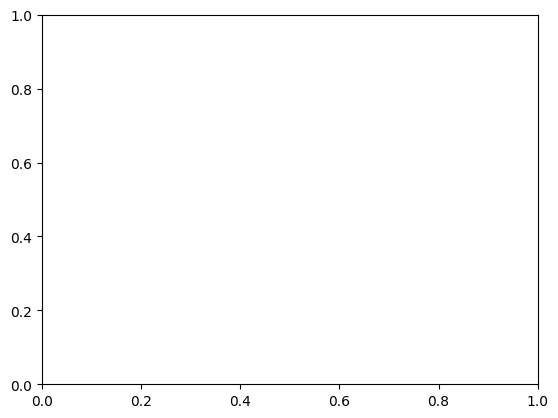

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

# Өгөгдлийг шалгах, эсвэл нэмэгдүүлэх
# Хэрэв res.items() нь сул өгөгдөл агуулж байвал эдгээрийг задалж, томруулах хэрэгтэй

_, ax = plt.subplots()
for alpha, profiles in res.items():
    for profile, data in profiles.items():
        values = list(data.values())
        # Нэмэлт: bandwidth тохируулж үзэх
        kde = gaussian_kde(values, bw_method='silverman')
        # KDE-г диаграмм дээр гаргах
        x = np.linspace(-1, 1, 1000)
        ax.plot(x, kde(x), label=f'alpha={alpha}')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim((-1, 1))
plt.legend(fontsize=15)
plt.show()


Тус бүрийн KDE нь өөр өөр **доройтлын коэффициент** бүхий нийцлийн тархалтыг тодорхойлдог: **Альфа** (α) өндөр байх тусам, тооцоолсон утга **тус бүрийн нодод илүү локал** болно.

In [ ]:
conf_a3 = res['3.0']['house']

In [ ]:
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]


Most disassortative characters

In [ ]:
for nd in node_assortativity[0:5]:
  print(f"{nd[0]: >20}\t{nd[1]: >10}\t{g.nodes[nd[0]]['house']: >20}")

                   A	      -1.0	                   1
                   B	      -1.0	                   2
                   C	      -1.0	                   3


Less disassortative characters

In [ ]:
for nd in list(reversed(node_assortativity[-6:-1])):
  print(f"{nd[0]: >20}\t{nd[1]: >10}\t{g.nodes[nd[0]]['house']: >20}")

                   B	      -1.0	                   2
                   A	      -1.0	                   1


In [ ]:
na = {c[0]: c[1] for c in node_assortativity}

In [ ]:
na = {c[0]: c[1] for c in node_assortativity}

# pagerank-аас дээд 5 байр эзэлсэн зүйлсийг авна
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
print(ranks[0:5])

[('Jon-Snow', 0.018999569248566855), ('Tyrion-Lannister', 0.018341232619311046), ('Jaime-Lannister', 0.015437447356269757), ('Stannis-Baratheon', 0.013648810781186758), ('Arya-Stark', 0.013432050115231258)]


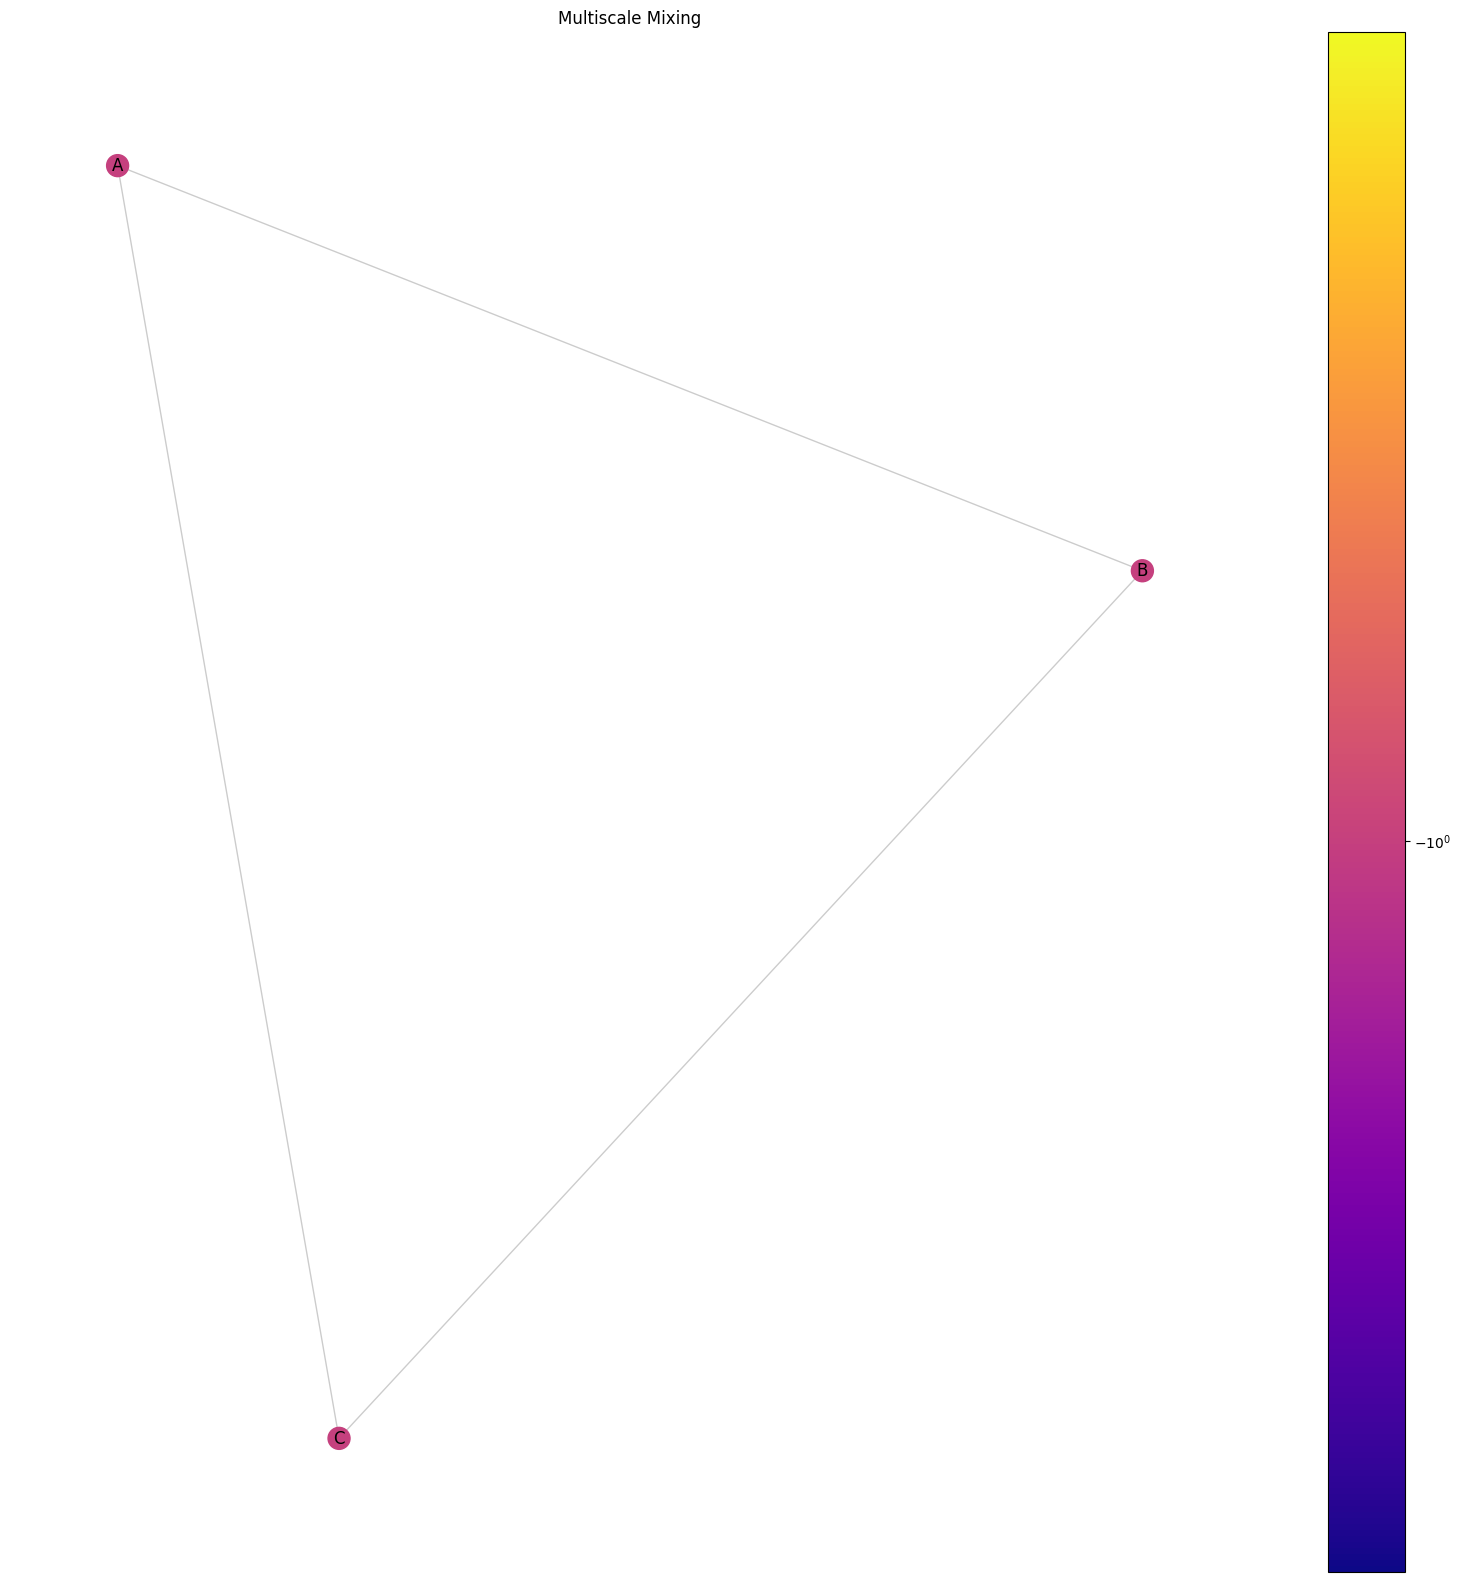

In [ ]:
draw_net(g,pos, na, "Multiscale Mixing")

**Lab 7 part 2**

Таны код нь **үндсэн граф** үүсгэж, тэр графын **degree centrality**-г тооцоолох зорилготой.

### 1. **Граф үүсгэх:**
   - `nx.Graph()` ашиглан **үндсэн граф** үүсгэж байна. Үндсэн граф бол чиглэлгүй, хоёр зангилаа хооронд харилцан хамааралтай байдаг граф юм.
   - Графад **зангилаанууд** болон тэдгээрийн хоорондох **холболтууд** тодорхойлогдсон байдаг. `edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]` нь эдгээр холболтуудыг зааж өгдөг.

### 2. **Degree centrality тооцоолох:**
   - **Degree centrality** нь тухайн зангилааны (нэг хэрэглэгчийн) бусад зангилаануудаас хэр их холбоо (холболт) авсныг харуулдаг. Өөрөөр хэлбэл, тухайн зангилаагийн **холбогдсон** (тусгайлан тооцсон) зангилаануудын **тоог** илэрхийлнэ.
   - `nx.degree_centrality(G)` нь энэ төвлөрлийг тооцоолдог бөгөөд тухайн графын бүх зангилааны төвлөрлийг хадгалсан үүсгэгдсэн dictionary-г буцаана.

### 3. **Үр дүн:**
   Код нь `degree_centrality`-г тооцоолсны дараа, төвлөрлийг хэвлэх болно. Та дараах байдлаар үр дүнг харах боломжтой:



Жишээ гаргалгаа:

{1: 0.6, 2: 0.8, 3: 0.8, 4: 0.8, 5: 0.4}

Энэ нь `degree centrality`-г 0-оос 1-ийн хоорондох утгаар хэмждэг бөгөөд хамгийн өндөр төвлөрөлтэй зангилаанууд илүү холбоотой байна.


In [ ]:
import networkx as nx

# Create an undirected graph
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
G.add_edges_from(edges)

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

In [ ]:
print("Degree Centrality for Undirected Graph:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

Degree Centrality for Undirected Graph:
Node 1: 0.5
Node 2: 0.75
Node 3: 0.75
Node 4: 0.75
Node 5: 0.25


Энэ код нь чиглэлтэй графын in-degree болон out-degree төвлөрлийг тооцоолдог.

1. **Чиглэлтэй граф үүсгэх:**  
   `DG = nx.DiGraph()` нь чиглэлтэй граф үүсгэдэг бөгөөд энэ графад зангилаа хоорондоо чиглэлтэй холболттой байдаг.

2. **Элсэлтийн болон гаргалтын төвлөрлийг тооцоолох:**  
   - **In-degree centrality:** Зангилаагийн олж авах чиглэлтэй холболтуудын тоо. Өөрөөр хэлбэл, тухайн зангилаанд ирэх холболтуудын тоог харуулна.
   - **Out-degree centrality:** Зангилаагийн гаргах чиглэлтэй холболтуудын тоо. Өөрөөр хэлбэл, тухайн зангилаанаас гарах холболтуудын тоог харуулна.

3. **Үр дүнг хэвлэх:**  
   Код нь in-degree болон out-degree төвлөрлийг бүгдийг хэвлэж байна.




In [ ]:
import networkx as nx

# Create a directed graph
DG = nx.DiGraph()
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]
DG.add_edges_from(edges)

# Compute in-degree and out-degree centrality
in_degree_centrality = nx.in_degree_centrality(DG)
out_degree_centrality = nx.out_degree_centrality(DG)

# Print results
print("\nIn-Degree Centrality for Directed Graph:")
for node, centrality in in_degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nOut-Degree Centrality for Directed Graph:")
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")


In-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.25
Node 4: 0.25
Node 5: 0.25

Out-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.5
Node 4: 0.25
Node 5: 0.0


Таны код нь `pandas` ашиглан дата фрейм үүсгэж, түүнийг ашиглан чиглэлтэй граф үүсгэж, графын degree centrality-г тооцоолж, хамгийн их төвлөрөлтэй хэрэглэгчдийг тодорхойлж байна.

### 1. **DataFrame үүсгэх:**
   Дата нь хоёр баганаар (`source`, `target`) тусгагдсан бөгөөд эдгээр нь хэрэглэгчид хоорондын харилцааг (эсвэл чиглэлтэй холбоосыг) илэрхийлнэ.

### 2. **Чиглэлтэй граф үүсгэх:**
   `nx.from_pandas_edgelist()` ашиглан энэ датаас чиглэлтэй граф (`DiGraph`) үүсгэнэ. Энэхүү функц нь DataFrame-ээс эх үүсвэр болон зорилтот хэрэглэгчийг оруулж граф үүсгэдэг.

### 3. **Degree centrality тооцоолох:**
   `nx.degree_centrality(G)` ашиглан графын бүх зангилааны degree centrality-г тооцоолно. Энэ нь тухайн зангилаагийн холбоотой зангилаануудаас олж авсан холболтын тоог харуулдаг.

### 4. **Топ 10 нөлөө бүхий хэрэглэгчийг олох:**
   Degree centrality-ийг бууруулах дарааллаар нь сортлоод, хамгийн их төвлөрөлтэй 10 хэрэглэгчийг гаргана.

Энэхүү код нь хэрэглэгчийн `degree centrality`-г тооцоолж, хамгийн их нөлөө бүхий 10 хэрэглэгчийг харуулна.


In [ ]:
import networkx as nx
import pandas as pd

data = {
    "source": ["user1", "user2", "user3", "user4", "user2", "user3", "user4", "user5", "user6", "user7",
               "user1", "user2", "user3", "user4", "user5"],
    "target": ["user2", "user3", "user4", "user1", "user5", "user6", "user7", "user6", "user1", "user2",
               "user8", "user9", "user10", "user11", "user12"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create directed graph
G = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Find top influencers
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Influencers based on Degree Centrality:")
for node, centrality in top_influencers:
    print(f"User {node}: {centrality}")


Top 10 Influencers based on Degree Centrality:
User user2: 0.4545454545454546
User user1: 0.36363636363636365
User user3: 0.36363636363636365
User user4: 0.36363636363636365
User user5: 0.2727272727272727
User user6: 0.2727272727272727
User user7: 0.18181818181818182
User user8: 0.09090909090909091
User user9: 0.09090909090909091
User user10: 0.09090909090909091
